# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import main

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [2]:
from scipy.linalg import solve_triangular

A1, b1 = main.spare_matrix_Abt(50, 12)                #Nasze macierze prostokątne
A_square, b_square = main.square_from_rectan(A1, b1)  #Nasze macierze zredukowane do kwadratowych

#1
x = np.linalg.solve(A_square, b_square)
np.allclose(np.dot(A_square, x), b_square) #Sprawdzenie wyniku
residuum = main.residual_norm(A_square, x, b_square)
print(f'Norma ze sprowadzeniem do NxN: {residuum}') 

#2 
x2 = np.linalg.lstsq(A1, b1, rcond=-1)[0]
residuum_2 = main.residual_norm(A1, x2, b1)
print(f'Norma wbudowanej metody lstsq: {residuum_2}')

#3
q, r = np.linalg.qr(A1)
x3 = solve_triangular(r, np.dot(q.T, b1))
residuum_3 = main.residual_norm(A1, x3, b1)
print(f'Norma rozkładu QR:             {residuum_3}')

#4
U, s, V = np.linalg.svd(A1, full_matrices = False)
S = np.diag(s) #bierze elementy z przekątnej
x4 = V.T @ np.linalg.solve(S,U.T @ b1)
residuum_4 = main.residual_norm(A1, x4, b1)
print(f'Norma rozkładu SVD:            {residuum_4}')

Norma ze sprowadzeniem do NxN: 3.7768475371212626e-14
Norma wbudowanej metody lstsq: 7.999154870357897e-09
Norma rozkładu QR:             7.999154858318113e-09
Norma rozkładu SVD:            7.99915443939323e-09


In [7]:
import timeit

#1
saved_timing_2 = %timeit -r 5 -n 10 -o main.square_from_rectan(A1, b1)
saved_timing_2 = %timeit -r 5 -n 10 -o np.linalg.solve(A_square, b_square)
%memit main.square_from_rectan(A1, b1) #wyskakuje mi błąd przy wyliczeniu zużycia pamięci

22.4 µs ± 6.18 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
69.6 µs ± 5.87 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


UsageError: Line magic function `%memit` not found.


In [19]:
#2
saved_timing = %timeit -r 5 -n 10 -o np.linalg.lstsq(A1, b1, rcond=-1)[0]

112 µs ± 4.74 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [34]:
#3
saved_timing = %timeit -r 5 -n 10 -o np.linalg.qr(A1)
saved_timing = %timeit -r 5 -n 10 -o solve_triangular(r, np.dot(q.T, b1)) 

146 µs ± 50.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
27.8 µs ± 9.71 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [37]:
#4
saved_timing = %timeit -r 5 -n 10 -o np.linalg.svd(A1, full_matrices = False)
saved_timing = %timeit -r 5 -n 10 -o np.diag(s)
saved_timing = %timeit -r 5 -n 10 -o V.T @ np.linalg.solve(S,U.T @ b1)

117 µs ± 53.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
3.33 µs ± 1.12 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
68.1 µs ± 12.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Wnioski:
Jak możemy zauważyć metoda rozwiązania ze sprowadzeniem do macierzy kwadratowej jest najbardziej dokładna oraz ma najkrótszy czas wykonania. Najgorzej pod względem czasowym wypada rozkład SVD, zbliżony wynik do rozkładu QR.

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [9]:
from scipy.linalg import solve_triangular
mean = 0 #wartość oczekiwana
sigma = 1 #odchylenie standardowe

#1
x1 = np.random.normal(mean, sigma, size = (100, 1))
x2 = np.random.normal(mean, sigma, size = (100, 1))

#2
epsilon = np.random.normal(mean, sigma, size = (100, 1))
y = 2 + x1 - 0.5 * x2 + epsilon

#3
O1 = np.ones(100)
W_1 = O1.reshape((-1, 1)) #wektor kolumnowy jedynek
polaczenie1 = np.concatenate((W_1, x1), axis=1)
polaczenie2 = np.concatenate((W_1, x2), axis=1)
polaczenie3 = np.concatenate((polaczenie1, x2), axis=1) 

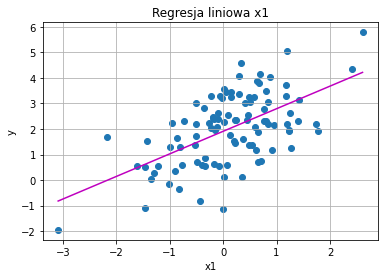

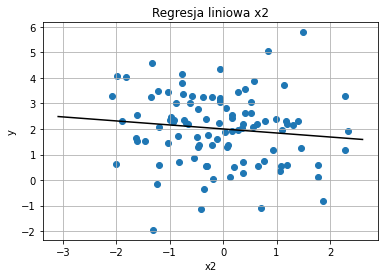

In [96]:
#Regresje 1-zmiennej
#4.1
Q, R = np.linalg.qr(polaczenie1)
beta = solve_triangular(R, np.matmul(Q.T, y))
pred1=[min(x1), max(x1)]
y_aprox = beta[0] + beta[1] * pred1

plt.scatter(x1, y)
plt.plot(pred1, y_aprox, 'm')
plt.grid()
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Regresja liniowa x1")
plt.show()

#4.2 
Q, R = np.linalg.qr(polaczenie2)
beta = solve_triangular(R, np.matmul(Q.T, y))
pred2=[min(x2), max(x2)]
y_aprox = beta[0] + beta[1] * pred1

plt.scatter(x2, y)
plt.plot(pred1, y_aprox, 'black')
plt.grid()
plt.xlabel("x2")
plt.ylabel("y")
plt.title("Regresja liniowa x2")
plt.show()

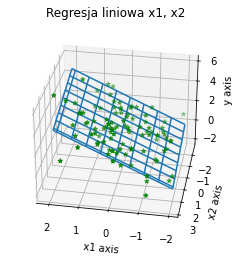

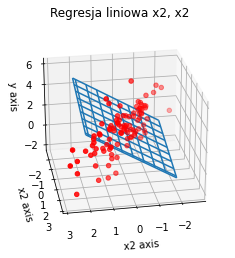

In [43]:
#Regresje 2 - zmiennych
#3
Q, R = np.linalg.qr(polaczenie3)
beta = solve_triangular(R, np.matmul(Q.T, y))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x1
Y = x2
Z = y

ax.scatter(X, Y, Z, color='green', marker="*")
ax.set_xlabel("x1 axis")
ax.set_ylabel("x2 axis")
ax.set_zlabel("y axis")
plt.title("Regresja liniowa x1, x2")

X, Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Z = beta[0] + beta[1] * X + beta[2] * Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)
ax.view_init(30,100)

plt.show()

#4
Q, R = np.linalg.qr(polaczenie3)
beta = solve_triangular(R, np.matmul(Q.T, y))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x2
Y = x2
Z = y

ax.scatter(X, Y, Z, color='red', marker="o")
ax.set_xlabel("x2 axis")
ax.set_ylabel("x2 axis")
ax.set_zlabel("y axis")
plt.title("Regresja liniowa x2, x2")

X, Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Z = beta[0] + beta[1] * X + beta[2] * Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)
ax.view_init(25,80)

plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)